<a href="https://colab.research.google.com/github/sandzmed/Bharat-intern-Task-2/blob/main/Movie_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/Movie.csv')

In [ ]:
df.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
df.shape

(27278, 3)

In [ ]:
df.drop(['genres'],axis=1,inplace=True)

In [ ]:
rating = pd.read_csv('/content/rating.csv')

In [ ]:
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [ ]:
rating = rating.loc[:,["userId","movieId","rating"]]
rating.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [ ]:
df = pd.merge(df,rating)

In [ ]:
df.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),3,4.0
1,1,Toy Story (1995),6,5.0
2,1,Toy Story (1995),8,4.0
3,1,Toy Story (1995),10,4.0
4,1,Toy Story (1995),11,4.5


In [ ]:
df.shape

(1043753, 4)

In [ ]:
df = df.iloc[:1000000]

In [ ]:
df.shape

(1000000, 4)

In [ ]:
df.describe()

,movieId,userId,rating
count,1000000.000000,1000000.000000,1000000.000000
mean,5485.860854,3511.414255,3.526983
std,11491.637094,2010.279021,1.053662
min,1.000000,1.000000,0.500000
25%,802.000000,1806.000000,3.000000
50%,2022.000000,3527.000000,4.000000
75%,4034.000000,5216.000000,4.000000
max,60950.000000,7068.000000,5.000000


Data Visualization

In [ ]:
df.groupby("title").mean()['rating'].sort_values(ascending=False)

title
Too Much Sleep (1997)                                 5.0
Cremaster 3 (2002)                                    5.0
Forbidden Christ, The (Cristo proibito, Il) (1950)    5.0
Cabeza de Vaca (1991)                                 5.0
The Incident (1967)                                   5.0
                                                     ... 
Secret Life of Girls, The (1999)                      0.5
Daughter of Dr. Jeckyll (1957)                        0.5
Alligator People, The (1959)                          0.5
Green Berets, The (1968)                              0.5
Where Angels Go, Trouble Follows (1968)               0.5
Name: rating, Length: 10536, dtype: float64

In [ ]:
df.groupby("title").count()["rating"].sort_values(ascending=False)

title
Pulp Fiction (1994)                                               3471
Forrest Gump (1994)                                               3447
Silence of the Lambs, The (1991)                                  3223
Shawshank Redemption, The (1994)                                  3189
Jurassic Park (1993)                                              3107
                                                                  ... 
Downhill (1927)                                                      1
Trial of Joan of Arc, The (Procès de Jeanne d'Arc) (1962)            1
Last Time, The (2006)                                                1
Triad Election (Election 2) (Hak se wui yi wo wai kwai) (2006)       1
Chinese Odyssey 2002 (Tian xia wu shuang) (2002)                     1
Name: rating, Length: 10536, dtype: int64

In [ ]:
ratings=pd.DataFrame(df.groupby("title").mean()['rating'])
ratings['number of ratings']=pd.DataFrame(df.groupby("title").count()["rating"])
print(ratings.head())

                             rating  number of ratings
title                                                 
'Round Midnight (1986)     3.785714                  7
'Salem's Lot (2004)        2.714286                  7
'Til There Was You (1997)  2.881579                 38
'burbs, The (1989)         3.042945                163
'night Mother (1986)       3.166667                 12


In [ ]:
ratings.sort_values(by='rating', ascending=False)

,rating,number of ratings
title,,
Too Much Sleep (1997),5.0,1
Cremaster 3 (2002),5.0,1
"Forbidden Christ, The (Cristo proibito, Il) (1950)",5.0,1
Cabeza de Vaca (1991),5.0,1
The Incident (1967),5.0,1
...,...,...
"Secret Life of Girls, The (1999)",0.5,1
Daughter of Dr. Jeckyll (1957),0.5,1
"Alligator People, The (1959)",0.5,1


In [ ]:
ratings.describe()

,rating,number of ratings
count,10536.000000,10536.000000
mean,3.225511,94.912680
std,0.740580,245.880705
min,0.500000,1.000000
25%,2.857143,4.000000
50%,3.363636,14.000000
75%,3.739028,65.000000
max,5.000000,3471.000000


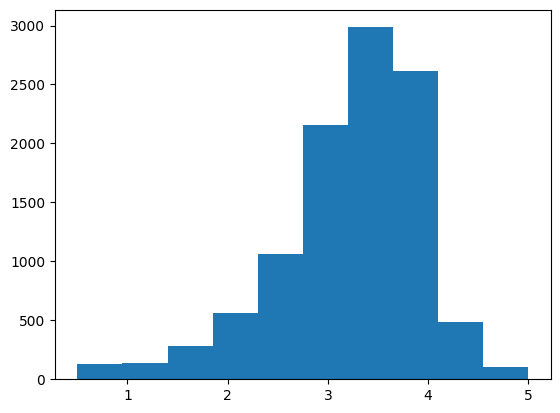

In [ ]:
plt.hist(ratings['rating'])
plt.show()

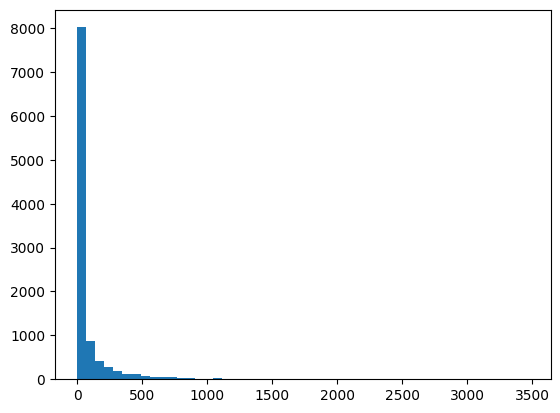

In [ ]:
plt.hist(ratings['number of ratings'],bins=50)
plt.show()

Recommender System

In [ ]:
pivot_table = df.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
pivot_table.head(8)

title,'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),*batteries not included (1987),"...All the Marbles (California Dolls, The) (1981)",...And God Spoke (1993),...And Justice for All (1979),.45 (2006),...,Zus & Zo (2001),[REC] (2007),"\\""Great Performances\""\"" Cats (1998)""",eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nos amours (1983),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pivot_table.shape

(7068, 10536)

In [ ]:
def recommend_movie(movie):
    movie_watched = pivot_table[movie]
    similarity_with_other_movies = pivot_table.corrwith(movie_watched)
    similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
    return similarity_with_other_movies.head()

In [ ]:
recommend_movie('Toy Story (1995)')

title
Before the Fall (NaPolA - Elite für den Führer) (2004)    1.0
Philadelphia Experiment II (1993)                         1.0
Take This Job and Shove It (1981)                         1.0
Bodies, Rest & Motion (1993)                              1.0
Robot Stories (2003)                                      1.0
dtype: float64

In [ ]:
recommend_movie('Taxi Driver (1976)')

title
Dead End (1937)                                         1.0
Slither (1973)                                          1.0
Living Dead Girl, The (Morte Vivante, La) (1982)        1.0
It All Starts Today (Ça commence aujourd'hui) (1999)    1.0
Little Vampire, The (2000)                              1.0
dtype: float64